### 1. Generate a sample dataset

Let's start by creating a simple synthetic dataset for classification using `make_classification` from `sklearn.datasets`.

In [1]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=0, n_classes=2, random_state=42
)

# Convert to a pandas DataFrame for easier handling
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

display(df.head())
print(f"Dataset shape: {df.shape}")

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,3.862397,-0.535557,-0.015638,-0.211069,0.595697,-1.371645,-1.716483,-0.330321,3.254942,1.423754,0
1,-2.755669,0.811330,-3.804874,-0.067306,0.202893,-1.371314,-1.415913,-2.124212,-1.977797,0.551652,0
2,1.379522,0.865157,2.438847,-1.432949,1.669455,-0.363050,2.209184,1.185895,0.812386,1.290548,0
3,-1.853986,2.093396,0.593962,-0.278429,4.124510,-0.042259,1.083051,0.321823,2.582363,1.138718,0
4,-0.200644,0.774291,1.100632,1.686651,-0.176100,0.644841,0.312577,-2.309505,-0.790793,-0.690141,1


Dataset shape: (1000, 11)


### 2. Split the data into training and testing sets

We'll use `train_test_split` to divide our dataset into features (X) and target (y), and then into training and testing sets.

In [2]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (700, 10)
X_test shape: (300, 10)
y_train shape: (700,)
y_test shape: (300,)


### 3. Initialize and Train a Decision Tree Classifier

Now, let's create a `DecisionTreeClassifier` instance and train it on our training data.

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
# You can experiment with parameters like max_depth, min_samples_leaf, etc.
dtree_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dtree_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully!")

Decision Tree Classifier trained successfully!


### 4. Make Predictions

Once the model is trained, we can use it to make predictions on the test set.

In [4]:
y_pred = dtree_classifier.predict(X_test)

print("First 10 predictions on the test set:")
print(y_pred[:10])
print("First 10 actual labels from the test set:")
print(y_test.values[:10])

First 10 predictions on the test set:
[1 1 1 1 0 1 1 1 1 1]
First 10 actual labels from the test set:
[1 1 1 1 0 1 1 1 1 0]


### 5. Evaluate the Model

We'll evaluate the model's performance using common classification metrics like accuracy, precision, recall, and F1-score, as well as a confusion matrix.

Accuracy: 0.8833

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       150
           1       0.92      0.84      0.88       150

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



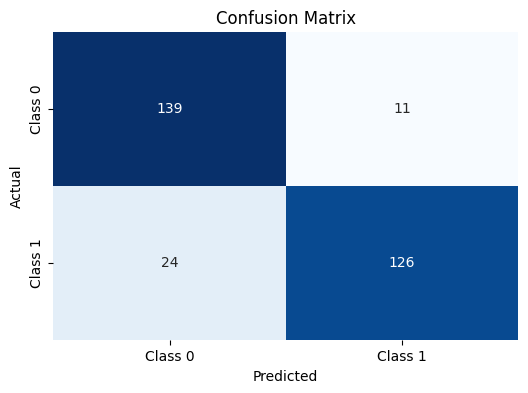

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 6. Visualize the Decision Tree (Optional)

Visualizing the decision tree can help in understanding how the model makes decisions. This is particularly useful for smaller trees.

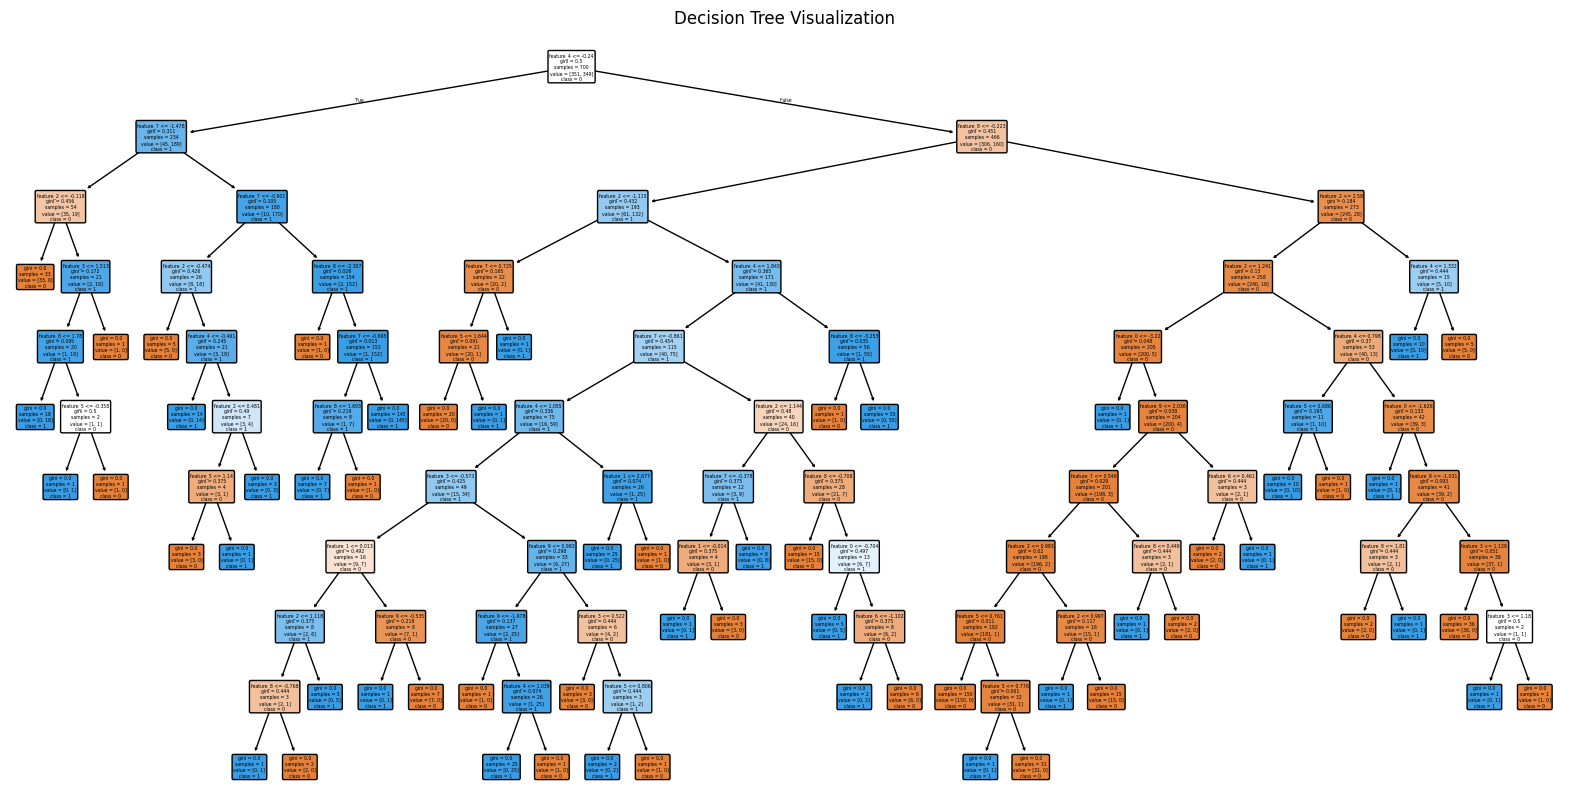

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dtree_classifier, filled=True, feature_names=X.columns.tolist(), class_names=['0', '1'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()